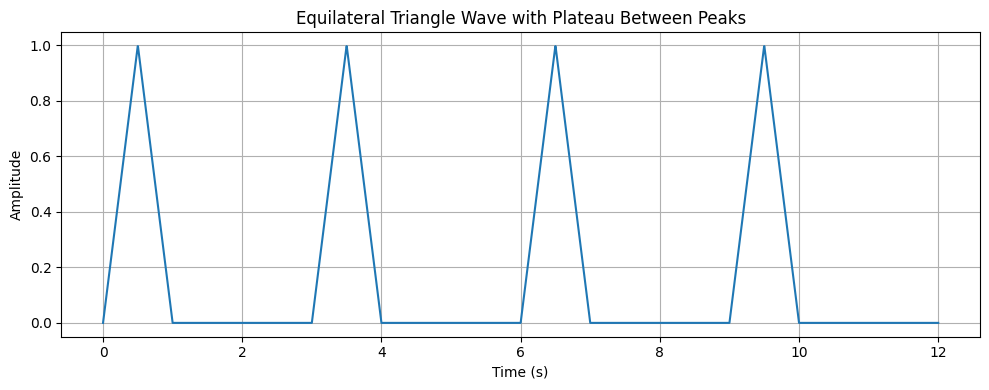

In [56]:
import numpy as np
import matplotlib.pyplot as plt


period = 3
plateau_width = 2
ramp_width = (period - plateau_width) / 2 

samples_per_period = 1000
t = np.linspace(0, period, samples_per_period)
wave = np.zeros_like(t)

ramp_up_start = 0
ramp_up_end = ramp_up_start + ramp_width
ramp_down_start = ramp_up_end
ramp_down_end = ramp_down_start + ramp_width
plateau_start = ramp_down_end
plateau_end = plateau_start + plateau_width


for i in range(len(t)):
    if t[i] < ramp_up_end:
        wave[i] = (t[i] - ramp_up_start) / ramp_width 
    elif t[i] < ramp_down_end:
        wave[i] = 1.0 - ((t[i] - ramp_up_end) / ramp_width) 
    elif t[i] < plateau_end:
        wave[i] = 0.0  
    else:
        wave[i] = 0.0 

num_periods = 4
t_full = np.tile(t, num_periods) + np.repeat(np.arange(num_periods) * period, samples_per_period)
wave_full = np.tile(wave, num_periods)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_full, wave_full)
plt.title("Equilateral Triangle Wave with Plateau Between Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [57]:
dt = np.mean(np.diff(t))
sampling_rate = 1/dt
n = len(wave_full)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

# Remove DC component
wave_full_zero_mean = wave_full - np.mean(wave_full)

# Recompute FFT
fft_values = np.fft.fft(wave_full_zero_mean)
magnitude = np.abs(fft_values)

# Consider only the positive half of the spectrum
half_n = n // 2
frequencies = frequencies[:half_n]

# Find the dominant frequency
dominant_freq = frequencies[np.argmax(magnitude)]

dominant_freq * 60 # Blinks per minute

19.98

In [ ]:
nums1 = [1,2,3,0,0,0]
m = 3
nums2 = [2,5,6]
n = 3

last = m+n-1

while (m > 0) and (n > 0):
    if nums1[m - 1] >= nums2[n - 1]:
        print(nums1[m-1], nums2[n-1])
        nums1[last] = nums1[m-1]
        m-=1
        
    else:
        print(nums1[m-1], nums2[n-1])
        nums1[last] = nums2[n-1]
        n-=1
    
    last -= 1
        
while (n > 0):
    nums1[last] = nums2[n]
    n-=1
    last-=1       


3 6
3 5
3 2
2 2
1 2


[1, 2, 2, 3, 5, 6]

In [ ]:
numbers = [-1, 0]
target = -1

i = 0
j = len(numbers) - 1

while (i != j):
    sum = numbers[i] + numbers[j]
    if sum == target:
        print( [i+1, j+1])
        break
    elif sum > target:
        j -= 1
    elif sum < target:
        i +=1
        


[1, 2]


In [80]:
prices = [2, 1, 4]

max_difference = 0
min_price = float('inf')

for price in prices:
    if price < min_price:
        min_price = price
    else:
        max_difference = max(max_difference, price - min_price)


        
max_difference

3

In [ ]:

s = "3[a]2[bc]"
stack = []
current_num = 0
current_str = ""


for char in s:
    if char.isnumeric():
        current_num = current_num * 10 + int(char)
    elif char == "[":
        stack.append((current_num, current_str))
        current_num = 0
        current_str = ''
    elif char == "]":
        prev_num, prev_str = stack.pop()
        current_str = prev_str + prev_num*current_str
    else:
        current_str += char

current_str

'aaabcbc'

In [23]:
s = "bbbbb"
seen = set()
maxv = 0
i = 0
for char in s:
    print(char)
    if char in seen:
        print("hi")
        maxv = max(i, maxv)
        i = 0
        seen = set()
    else:
        seen.add(char)
        i+=1
        
maxv = max(maxv, i)

maxv

b
b
hi
b
b
hi
b


1

In [ ]:
arr = [1,2,3,4,5]
k = 4
x = -1


def isCloser(a, b, x):
    abs_a = abs(a-x)
    abs_b = abs(b-x)
    if abs_a != abs_b:
        return (abs_a < abs_b)
    else:
        return a < b

i = 0
j = len(arr) - 1


while (i <= j):
    left = arr[i]
    right = arr[j]

    if (j-i) + 1 > k:
        if isCloser(left, right, x):
            j-=1
        else:
            i+=1
    elif (j-i)+1 ==k:
        print(arr[i:j+1])
        break

True
[1, 2, 3, 4]


12.75

In [ ]:
nums = [1,12,-5,-6,50,3]
k = 4
i = 0
curr_sum = sum(nums[:k-1])



max_sum = -float('inf')

for j in range(k-1, len(nums)):
    curr_sum += nums[j]

    if (j-i + 1) == k:
        max_sum = max(curr_sum, max_sum)
        curr_sum -= nums[i]
        i+=1
                
max_sum/k

-6
50
3


12.75

In [ ]:
code = [5,7,1,4]
k = 3
N = len(code)

res = [0] * N

curr_sum = 0

if k == 0:
    print(res)

i = 0
for j in range(N + abs(k)):
    curr_sum += code[j % N]
    print(curr_sum)
        
    if (j-i + 1) == abs(k):
        if k > 0:
            res[(i-1) % N] = curr_sum
        elif k < 0:
            res[(j+1) % N] = curr_sum
            
        curr_sum -= code[i % N]
        i = (i + 1) % N
    
    
res
        

5
12
13
12
10
16
13


[12, 10, 16, 13]

In [24]:
num = 430043 
k = 2
count = 0

num_str = str(num)

for i in range(len(num_str) - k + 1):
    divisor = int(num_str[i:i+k])
    print(f"{num}, {divisor}")
    if divisor != 0 and num % divisor == 0:
        count += 1
        
count

430043, 43
430043, 30
430043, 0
430043, 4
430043, 43


2

In [32]:
blocks = "WBBWWBBWBW"
k = 7

counts = {"B": 0, "W": 0}
min_recolors = float('inf')

i = 0

for j in range(len(blocks)):
    counts[blocks[j]] += 1
    if (j - i + 1) == k:
        print(counts)
        min_recolors = min(min_recolors, counts["W"])
        counts[blocks[i]] -= 1
        i += 1
        
min_recolors
    
    


{'B': 4, 'W': 3}
{'B': 4, 'W': 3}
{'B': 4, 'W': 3}
{'B': 3, 'W': 4}


3

In [47]:
from typing import List
code = [2,4,9,3]
k = -2
n = len(code)

def decrypt(code: List[int], k: int):
    curr_sum = 0
    
    decoded = [0] * n

    if k == 0:
        return decoded
    
    i = 0
    for j in range(len(code) + abs(k)):
        curr_sum += code[j % n]
                        
        if (j - i + 1) == abs(k):
            if k < 0:
                decoded[(j + 1) % n] = curr_sum
            elif k > 0:
                decoded[(i - 1) % n] = curr_sum
        
            curr_sum -= code[i % n]
            i+=1
        
    return decoded
    
decrypt(code, k)

[12, 5, 6, 13]